In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances

# Greedy Initialization of k-means

Compare two different initializations of the k-means algorithm.

Let's consider the following dataset

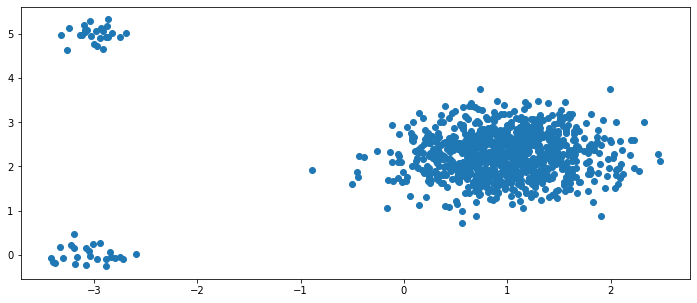

In [2]:
X = np.zeros((1000,2))

X[0:25] = 0.2*np.random.randn(25,2) + [-3,0] # blob 1
X[25:50] = 0.2*np.random.randn(25,2) + [-3,5] # blob 2
X[50:1000] = 0.5*np.random.randn(950,2) + [1,2.25] # blob 3

plt.figure(figsize=(12,5))
plt.scatter(X[:,0],X[:,1])

This dataset has three clusters (one big blog, and two smaller blobs).

**Random initialization:** the initial cluster's centers are randomly chosen from the dataset points.

In [3]:
k = 3 # nuber of clusters
m = 1000 # number of datapoints
means = X[np.random.choice(m,k)] # initial k means
means

array([[-3.31733291,  4.98292753],
       [ 0.71244355,  3.30213353],
       [ 1.14896376,  1.06829507]])

In [4]:
# initial clusters
dist = pairwise_distances(X,means)
clusters = np.argmin(dist, axis=1)
clusters

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 1, 2, 2, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 1,
       2, 2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 2, 1, 2, 2, 2, 1, 2,
       1, 2, 2, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 1, 2,
       2, 2, 1, 2, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 2, 1, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 2, 2,
       2, 2, 1, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 2,
       2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       1, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1,
       2, 1, 2, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1,

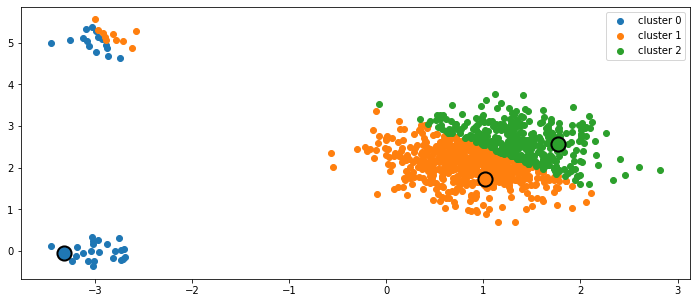

In [75]:
plt.figure(figsize=(12,5))
colors = ['C0','C1','C2']
for i in range(k):
    # plot dataset points
    plt.scatter(X[clusters==i,0],X[clusters==i,1],color=colors[i], label = 'cluster '+str(i))
    # plot cluster mean'
    plt.scatter(means[i,0],means[i,1],
                marker='o',
                s= 200,  
                linewidths = 2,
                color = colors[i], 
                edgecolors='black')
plt.legend()

**Greedy initialization:** consider the following initialization method which we denote as the *greedy initialization method*:

- For the first cluster center, pick one of the dataset points at random.
- Pick each remaining cluster center as the dataset point as far from the previous centers as possible.

## Part 1

Compute the initial clusters (with k=3) if the initial cluster's centers are chosen using the greedy initialization.

In [85]:
k = 1 # nuber of clusters
m = 1000 # number of datapoints
cluster = X[np.random.choice(m,k)] # initial k means
cluster1=cluster.reshape(2,)
cluster1

array([0.76791488, 2.62474784])

In [77]:
dist = pairwise_distances(X,cluster)
dist

array([[4.32516379],
       [4.16688378],
       [4.0256798 ],
       [4.50914301],
       [4.56017201],
       [4.57285879],
       [4.18922443],
       [4.68382214],
       [4.24523084],
       [4.74112404],
       [4.21889414],
       [4.26774281],
       [4.29832624],
       [4.3521443 ],
       [4.60865886],
       [4.19365464],
       [4.4207273 ],
       [4.13902832],
       [4.2929708 ],
       [4.50439831],
       [4.09315748],
       [4.23874179],
       [4.67405995],
       [4.50583554],
       [4.69840846],
       [4.96066783],
       [4.58483322],
       [4.77868072],
       [5.03221991],
       [5.19703147],
       [5.05132203],
       [4.81892106],
       [4.94095391],
       [5.22029132],
       [4.81344124],
       [5.23136294],
       [4.96013493],
       [5.02068958],
       [5.1227761 ],
       [4.53038507],
       [5.13986105],
       [5.32711351],
       [4.95473543],
       [4.76756123],
       [4.66023178],
       [5.12316116],
       [4.84522069],
       [4.908

In [78]:
dist1=np.sort(dist,axis=0)[-1]
dist1

array([5.32711351])

In [83]:
np.argmax(dist)


41

In [84]:
np.where(dist==dist1)[0]

array([41], dtype=int64)

In [47]:
cluster2=X[np.where(dist==dist1)[0]]
cluster2=cluster2.reshape(2,)

In [48]:
mean1=np.vstack((cluster1,cluster2))
mean1

array([[ 0.67944839,  2.31354667],
       [-3.17925767,  5.53984433]])

In [60]:
dist = np.sum(pairwise_distances(X,mean1),axis=1)
dist

array([ 9.27428913, 10.38837585, 10.28728296,  9.95623083,  9.60669761,
        9.71532243,  9.96186744,  9.92999274,  9.59971067, 10.57020853,
        9.67693592, 10.08422004,  9.77165697,  9.40066525,  9.8148892 ,
       10.54759637, 10.14350836,  9.77553749,  8.89219514, 10.09522185,
        9.76679295,  9.82280941,  9.49382183, 10.27610316, 10.29863421,
        5.43512462,  5.04020159,  5.25021523,  5.09952471,  5.64780427,
        5.03414039,  5.05246539,  5.10498155,  5.13057534,  5.04653939,
        5.11518635,  5.10170119,  5.08086425,  5.05669252,  5.21020525,
        5.18362638,  5.07545898,  5.04070043,  5.24446788,  5.09473162,
        5.02977227,  5.17330917,  5.08520811,  5.09072267,  5.1454833 ,
        6.6115546 ,  6.00760834,  5.15946512,  5.69149001,  6.03463545,
        6.89266459,  5.92046279,  5.57124094,  5.05635377,  5.03140951,
        5.43252601,  7.51312325,  7.48605439,  5.56949586,  5.97109187,
        5.49191769,  7.08721187,  5.79537278,  5.2150006 ,  7.04

In [62]:
dist2 = np.sort(dist, axis=0)[-1]
dist2

10.570208532933048

In [70]:
np.argmax(dist)

794

In [64]:
np.where(dist==dist2)[0]

array([9], dtype=int64)

In [66]:

cluster3=X[np.where(dist==dist2)[0]]
cluster3

array([[-3.25093868, -0.30637434]])

In [67]:
cluster3=cluster3.reshape(2,)
means=np.vstack((cluster1,cluster2,cluster3))
means

array([[ 0.67944839,  2.31354667],
       [-3.17925767,  5.53984433],
       [-3.25093868, -0.30637434]])

In [68]:
means=np.vstack((cluster1,cluster2,cluster3))
# initial clusters
dist = pairwise_distances(X,means)
clusters = np.argmin(dist, axis=1)
clusters

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

## Part 2

Plot the initial clusters

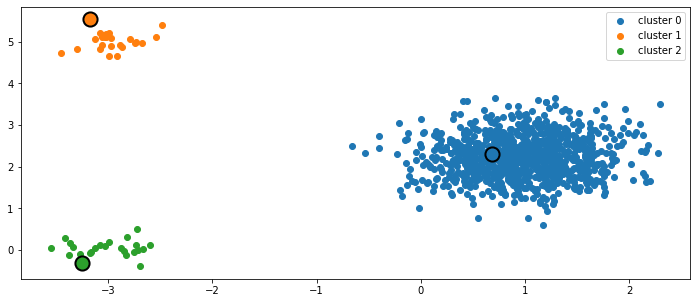

In [69]:
k = 3
plt.figure(figsize=(12,5))
colors = ['C0','C1','C2']
for i in range(k):
    # plot dataset points
    plt.scatter(X[clusters==i,0],X[clusters==i,1],color=colors[i], label = 'cluster '+str(i))
    # plot cluster mean'
    plt.scatter(means[i,0],means[i,1],
                marker='o',
                s= 200,  
                linewidths = 2,
                color = colors[i], 
                edgecolors='black')
plt.legend()